In [1]:
#Julian Esteban Cordero Ramos - Arboles Decision

In [3]:
#importamos las librerias

import pandas as pd
import  numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score

In [67]:
#Cargamos el dataset y mostramos las 5 primeras filas

data= pd.read_csv("C:/Users/julia/Documents/UNAD/8. OCTAVO SEMESTRE\ANALISIS DE DATOS/Tarea 3 - Algoritmos de Aprendizaje Supervisado/Anexo 4 - Dataset Red Wine Quality/VINOS.csv")
data.head()

,Acidez_fija,acidez_volatil,acido_citrico,azucar_residual,cloruros,dioxido_azufre_libre,dioxido_azufre_total,densidad,pH,sulfatos,alcohol,calidad
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [68]:
data.shape

(1599, 12)

In [69]:
data.describe()

,Acidez_fija,acidez_volatil,acido_citrico,azucar_residual,cloruros,dioxido_azufre_libre,dioxido_azufre_total,densidad,pH,sulfatos,alcohol,calidad
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [70]:
data.isna().sum()
#saber si tengo o no valores nulos

Acidez_fija             0
acidez_volatil          0
acido_citrico           0
azucar_residual         0
cloruros                0
dioxido_azufre_libre    0
dioxido_azufre_total    0
densidad                0
pH                      0
sulfatos                0
alcohol                 0
calidad                 0
dtype: int64

(array([ 45., 229., 542., 371., 188., 110.,  76.,  26.,   5.,   7.]),
 array([ 4.6 ,  5.73,  6.86,  7.99,  9.12, 10.25, 11.38, 12.51, 13.64,
        14.77, 15.9 ]),
 <BarContainer object of 10 artists>)

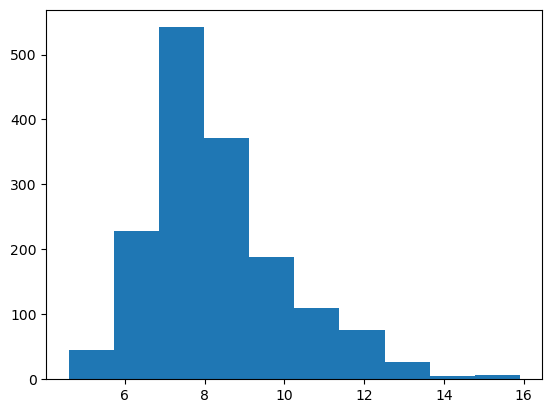

In [71]:
plt.hist(data.Acidez_fija)

In [72]:
#plt.hist(data.azucar_residual)

data.columns


Index(['Acidez_fija', 'acidez_volatil', 'acido_citrico', 'azucar_residual',
       'cloruros', 'dioxido_azufre_libre', 'dioxido_azufre_total', 'densidad',
       'pH', 'sulfatos', 'alcohol', 'calidad'],
      dtype='object')

Text(0.5, 1.0, 'identificacion datos faltantes y atipicos')

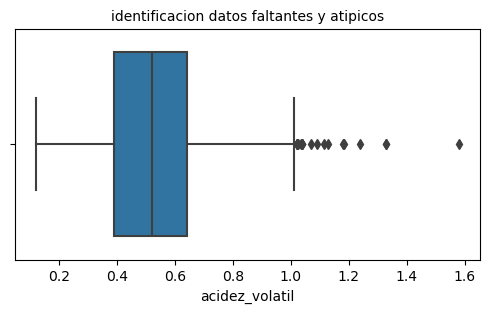

In [74]:
#Valores faltantes y atipicos.

plt.figure(figsize=(6,3))
sns.boxplot(x=data['acidez_volatil']) #Diagrama de cajas
plt.title('identificacion datos faltantes y atipicos',fontsize=10)

(array([403., 203., 316., 205., 262., 132.,  62.,  15.,   0.,   1.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

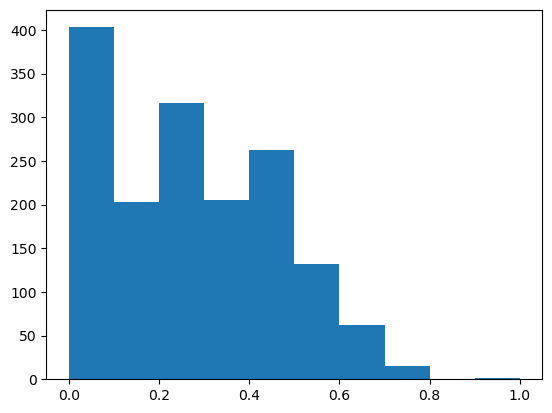

In [75]:
plt.hist(data.acido_citrico)

(array([403., 203., 316., 205., 262., 132.,  62.,  15.,   0.,   1.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

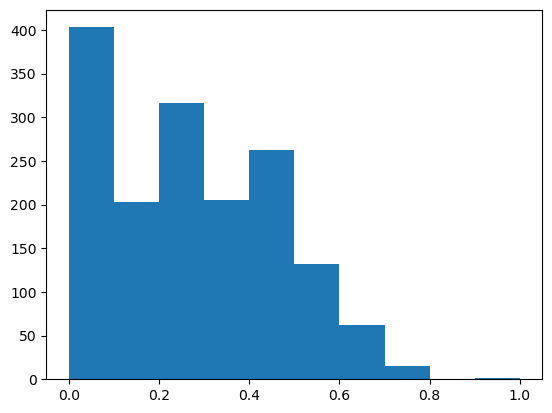

In [76]:
plt.hist(data.acido_citrico)

(array([994., 463.,  67.,  45.,  11.,   8.,   3.,   0.,   5.,   3.]),
 array([ 0.9 ,  2.36,  3.82,  5.28,  6.74,  8.2 ,  9.66, 11.12, 12.58,
        14.04, 15.5 ]),
 <BarContainer object of 10 artists>)

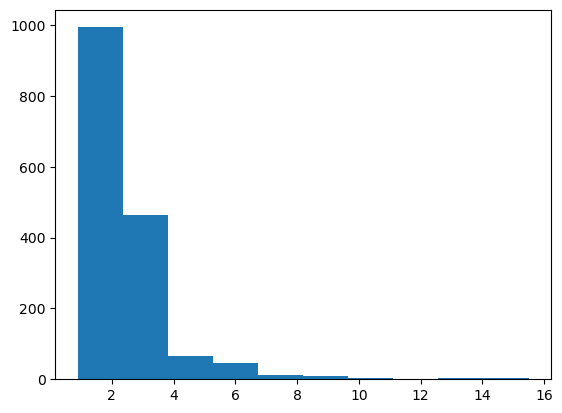

In [77]:
plt.hist(data.azucar_residual)


(array([ 457., 1064.,   35.,   18.,    3.,    8.,   10.,    2.,    0.,
           2.]),
 array([0.012 , 0.0719, 0.1318, 0.1917, 0.2516, 0.3115, 0.3714, 0.4313,
        0.4912, 0.5511, 0.611 ]),
 <BarContainer object of 10 artists>)

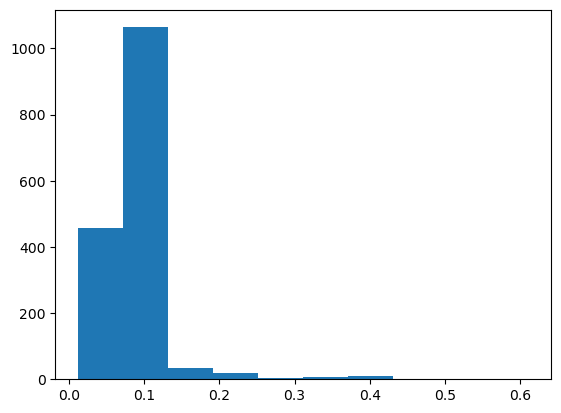

In [78]:
plt.hist(data.cloruros)


(array([  2.,  27., 134., 361., 555., 352., 132.,  29.,   3.,   4.]),
 array([2.74 , 2.867, 2.994, 3.121, 3.248, 3.375, 3.502, 3.629, 3.756,
        3.883, 4.01 ]),
 <BarContainer object of 10 artists>)

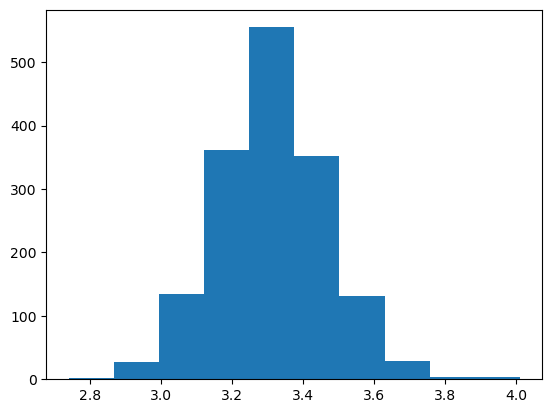

In [79]:
plt.hist(data.pH)


(array([151., 855., 416., 118.,  32.,  15.,   4.,   4.,   0.,   4.]),
 array([0.33 , 0.497, 0.664, 0.831, 0.998, 1.165, 1.332, 1.499, 1.666,
        1.833, 2.   ]),
 <BarContainer object of 10 artists>)

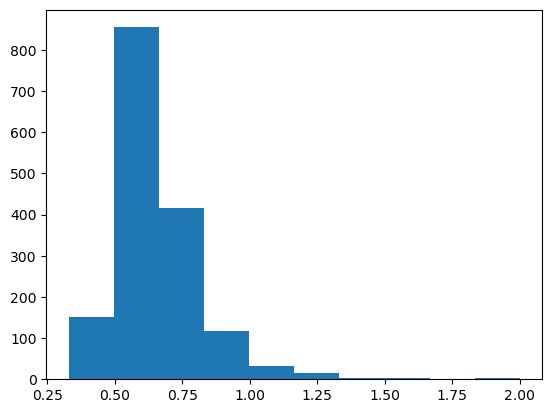

In [80]:
plt.hist(data.sulfatos)

In [81]:
# Eliminar los registros mayores a 12 en la columna 'azucar_residual'
data = data[data['azucar_residual'] <= 12]


(array([464., 894., 105.,  51.,  33.,  22.,   9.,   9.,   1.,   3.]),
 array([ 0.9 ,  1.91,  2.92,  3.93,  4.94,  5.95,  6.96,  7.97,  8.98,
         9.99, 11.  ]),
 <BarContainer object of 10 artists>)

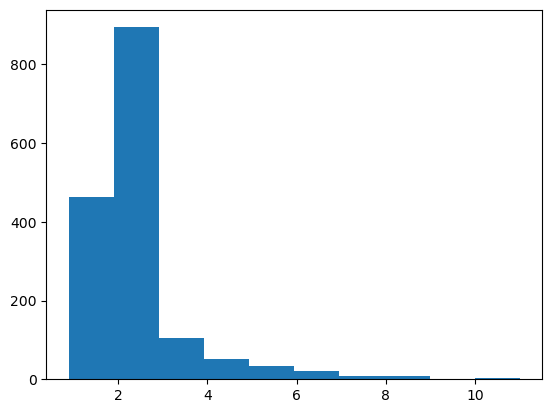

In [82]:
plt.hist(data.azucar_residual)

In [ ]:
# LA SIGUIENTE GRAFICA FUNCIONABA PERO CUANDO DIVIDI LOS DATOS EN TRAIN Y TEST SE DAÑÓ Y NO PUDE REALMENTE VOLVER A HACERLA

In [99]:
sns.scatterplot(X="densidad", Y = "alcohol", hue = "calidad", data = data)

ValueError: The following variable cannot be assigned with wide-form data: `hue`

In [96]:
# FUNCIONABA ESTA GRAFICA PERO CUANDO DIVIDI LOS DATOS EN TRAIN Y TEST SE DAÑÓ

In [87]:
#3. Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características. 
predictors_col = ["Acidez_fija", "acidez_volatil", "acido_citrico", "azucar_residual", "cloruros", "dioxido_azufre_libre", "dioxido_azufre_total", "densidad", "pH", "sulfatos", "alcohol"]

target_col=['calidad']

In [88]:
predictors= data[predictors_col]
target=data[target_col]

In [89]:
predictors

,Acidez_fija,acidez_volatil,acido_citrico,azucar_residual,cloruros,dioxido_azufre_libre,dioxido_azufre_total,densidad,pH,sulfatos,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [90]:
target

,calidad
0,5
1,5
2,5
3,6
4,5
...,...
1594,5
1595,6
1596,6
1597,5


In [91]:
corr = predictors.corr()
corr

,Acidez_fija,acidez_volatil,acido_citrico,azucar_residual,cloruros,dioxido_azufre_libre,dioxido_azufre_total,densidad,pH,sulfatos,alcohol
Acidez_fija,1.000000,-0.259662,0.676596,0.132626,0.087390,-0.161610,-0.111070,0.671040,-0.682795,0.180232,-0.056776
acidez_volatil,-0.259662,1.000000,-0.552641,0.035314,0.060817,-0.006864,0.082094,0.025347,0.235035,-0.263519,-0.203906
acido_citrico,0.676596,-0.552641,1.000000,0.135062,0.201546,-0.070128,0.031249,0.364587,-0.542935,0.314688,0.113918
azucar_residual,0.132626,0.035314,0.135062,1.000000,0.011008,0.119123,0.182907,0.336119,-0.076755,0.004762,0.093154
cloruros,0.087390,0.060817,0.201546,0.011008,1.000000,-0.016294,0.041626,0.184194,-0.262025,0.370350,-0.214302
dioxido_azufre_libre,-0.161610,-0.006864,-0.070128,0.119123,-0.016294,1.000000,0.666764,-0.052340,0.078818,0.050232,-0.058626
dioxido_azufre_total,-0.111070,0.082094,0.031249,0.182907,0.041626,0.666764,1.000000,0.063474,-0.065375,0.044548,-0.205005
densidad,0.671040,0.025347,0.364587,0.336119,0.184194,-0.052340,0.063474,1.000000,-0.338164,0.146026,-0.491861
pH,-0.682795,0.235035,-0.542935,-0.076755,-0.262025,0.078818,-0.065375,-0.338164,1.000000,-0.195434,0.202479
sulfatos,0.180232,-0.263519,0.314688,0.004762,0.370350,0.050232,0.044548,0.146026,-0.195434,1.000000,0.096524


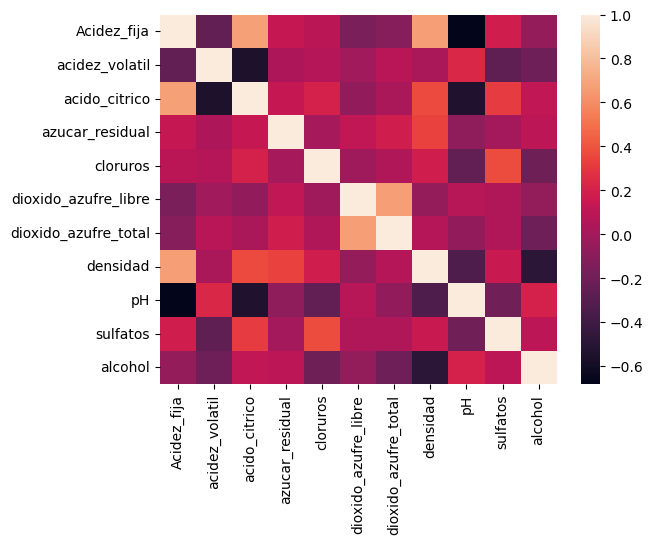

In [92]:
sns.heatmap(corr)
plt.show()

In [100]:
#4. Dividir el dataset en Train y Test para evaluar correctamente el modelo.

# Porcentajes de datos para entrenamiento (Train = 80 % ) ; y para prueba ( Test = 20% )

#la funcion train_test_split crea una división de un conjunto de datos en dos bloques, uno de entrenamiento y otro de prueba (train and test)

X_train , X_test ,Y_train , Y_test = train_test_split(predictors,target, test_size=0.2 , random_state=13)


In [101]:
tree= DecisionTreeClassifier()

In [102]:
arbol= tree.fit(X_train,Y_train)

[Text(0.47178133432922126, 0.9761904761904762, 'x[10] <= 10.525\ngini = 0.644\nsamples = 1272\nvalue = [8, 44, 534, 514, 158, 14]'),
 Text(0.22278575558982266, 0.9285714285714286, 'x[9] <= 0.535\ngini = 0.549\nsamples = 768\nvalue = [5, 30, 446, 256, 30, 1]'),
 Text(0.022648419429452584, 0.8809523809523809, 'x[7] <= 0.994\ngini = 0.36\nsamples = 174\nvalue = [2, 14, 137, 20, 1, 0]'),
 Text(0.016480339244410176, 0.8333333333333334, 'x[10] <= 9.65\ngini = 0.375\nsamples = 4\nvalue = [0, 3, 1, 0, 0, 0]'),
 Text(0.013396299151888974, 0.7857142857142857, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1, 0, 0, 0]'),
 Text(0.01956437933693138, 0.7857142857142857, 'gini = 0.0\nsamples = 3\nvalue = [0, 3, 0, 0, 0, 0]'),
 Text(0.02881649961449499, 0.8333333333333334, 'x[1] <= 0.3\ngini = 0.342\nsamples = 170\nvalue = [2, 11, 136, 20, 1, 0]'),
 Text(0.025732459521973786, 0.7857142857142857, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 0, 2, 0, 0]'),
 Text(0.031900539707016194, 0.7857142857142857, 'x[3] <= 

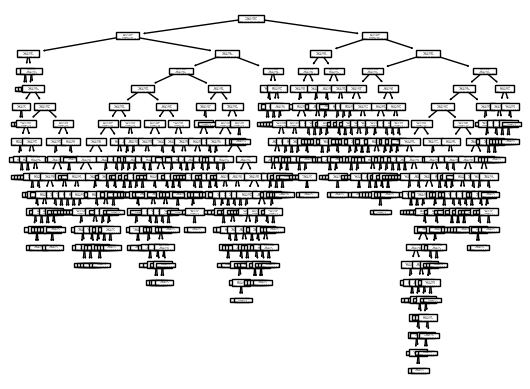

In [103]:
plot_tree(arbol)

In [104]:
predicciones=arbol.predict(X_test)
predicciones

array([5, 7, 5, 6, 5, 7, 5, 5, 5, 8, 6, 6, 6, 5, 4, 5, 7, 5, 8, 6, 5, 6,
       8, 5, 5, 6, 8, 5, 6, 5, 6, 6, 6, 5, 6, 5, 5, 6, 5, 5, 6, 5, 6, 6,
       7, 7, 6, 6, 7, 5, 6, 5, 5, 6, 6, 5, 5, 5, 6, 6, 5, 7, 5, 7, 6, 6,
       5, 5, 6, 6, 6, 6, 5, 5, 7, 5, 7, 6, 7, 6, 5, 5, 6, 7, 6, 5, 6, 5,
       6, 5, 5, 7, 6, 4, 5, 6, 6, 5, 7, 7, 7, 6, 6, 7, 6, 6, 5, 6, 5, 7,
       6, 6, 7, 5, 5, 6, 5, 6, 6, 6, 5, 5, 5, 6, 6, 7, 5, 5, 6, 5, 6, 6,
       4, 5, 5, 7, 5, 5, 6, 6, 5, 5, 6, 5, 5, 6, 8, 5, 6, 5, 5, 7, 6, 6,
       6, 5, 5, 5, 5, 5, 6, 5, 6, 6, 5, 7, 5, 5, 5, 6, 5, 5, 6, 5, 6, 5,
       7, 5, 6, 5, 7, 5, 5, 6, 5, 5, 6, 5, 5, 5, 5, 5, 5, 6, 5, 5, 6, 4,
       7, 6, 5, 5, 5, 5, 5, 7, 5, 6, 6, 6, 5, 6, 5, 5, 6, 7, 5, 5, 6, 5,
       5, 5, 6, 6, 5, 5, 5, 6, 6, 5, 6, 6, 5, 4, 5, 6, 5, 6, 6, 5, 6, 7,
       6, 5, 6, 5, 5, 5, 7, 5, 6, 6, 5, 5, 6, 7, 5, 6, 6, 6, 6, 5, 6, 5,
       7, 6, 5, 6, 5, 5, 5, 6, 5, 6, 4, 5, 6, 5, 5, 5, 5, 7, 6, 5, 5, 6,
       5, 5, 7, 5, 6, 5, 6, 6, 5, 6, 5, 5, 4, 5, 5,

In [106]:
#Examinamos la matriz de confusión
pd.crosstab(np.array([y[0] for y in Y_test.values.tolist()]), predicciones, rownames=['Actual'], colnames=['Predicciones'])

Predicciones,4,5,6,7,8
Actual,,,,,
3,1,1,0,0,0
4,2,4,2,0,0
5,4,107,30,2,1
6,1,34,69,12,4
7,0,6,15,20,0
8,0,1,1,2,0
